In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [2]:
flood_df = pd.read_excel(r'D:\NSU\GitHub Repository\Flood_Assessment\model_train\text_dataset\flood.xlsx')
no_flood_df = pd.read_excel(r'D:\NSU\GitHub Repository\Flood_Assessment\model_train\text_dataset\not_flood.xlsx')

In [3]:
flood_df = flood_df[['Keyword', 'Content']]
flood_df['label'] = 'flood'
flood_df.head(5)

,Keyword,Content,label
0,Sylhet AND flood,Climate change costing poor women in Banglades...,flood
1,Sylhet AND flood,Sylhet flood victims in Bangladesh. \nAll fund...,flood
2,Sylhet AND flood,"Floods in Tahirpur,Sunamganj.\nSylhet, Banglad...",flood
3,Sylhet AND flood,Behind @sadia_totini is the remnants of a road...,flood
4,Sylhet AND flood,Sunamganj is the land of haors (lakes). But pe...,flood


In [4]:
no_flood_df['label'] = 'no_flood'
no_flood_df.head(5)

,Keyword,Content,label
0,Bangladesh AND Disaster,Heartfelt condolences for our beloved brothers...,no_flood
1,Bangladesh AND Disaster,\u201cWe haven\u2019t faced a crisis like this...,no_flood
2,Bangladesh AND Disaster,"However, unpredictable rainstorms are increasi...",no_flood
3,Bangladesh AND Disaster,Keep the people of Afghanistan and Bangladesh ...,no_flood
4,Bangladesh AND Disaster,"From all these disasters, Allah is the protect...",no_flood


In [5]:
df = pd.concat([flood_df, no_flood_df])

In [6]:
df.head(5)

,Keyword,Content,label
0,Sylhet AND flood,Climate change costing poor women in Banglades...,flood
1,Sylhet AND flood,Sylhet flood victims in Bangladesh. \nAll fund...,flood
2,Sylhet AND flood,"Floods in Tahirpur,Sunamganj.\nSylhet, Banglad...",flood
3,Sylhet AND flood,Behind @sadia_totini is the remnants of a road...,flood
4,Sylhet AND flood,Sunamganj is the land of haors (lakes). But pe...,flood


In [7]:
df.groupby('label').describe()

Keyword                                      Content         \
           count unique                      top freq   count unique   
label                                                                  
flood        244      1         Sylhet AND flood  244     167    166   
no_flood      59      2  Bangladesh AND Accident   45      59     59   

                                                                  
                                                        top freq  
label                                                             
flood     We’re Drowning &amp; World leaders are watchin...    2  
no_flood  Heartfelt condolences for our beloved brothers...    1

In [8]:
class_names = df['label'].unique()
class_names

array(['flood', 'no_flood'], dtype=object)

In [9]:
dataset_info = pd.DataFrame(list(zip(class_names, df['label'].value_counts())), columns =['label', 'count'])
dataset_info

,label,count
0,flood,244
1,no_flood,59


<Figure size 1440x576 with 0 Axes>

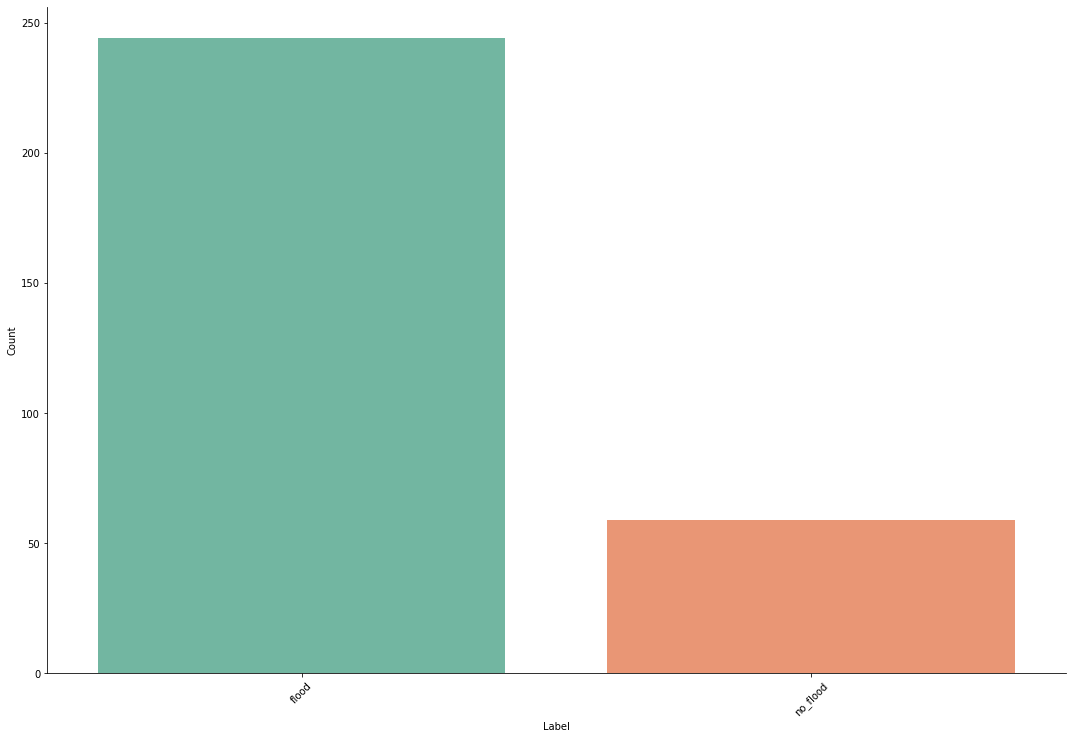

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))

g = sns.catplot(data=dataset_info, kind='bar', x='label', y='count', palette='Set2', height=10, aspect=1.5)

plt.xticks(rotation=45)
g.set_axis_labels('Label', 'Count')

In [11]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 8))

# g = sns.catplot(data=dataset_info, kind='bar', x='label', y='count', hue='label', palette='Set2', height=10, aspect=1.5)

# plt.xticks(rotation=45)
# g.set_axis_labels('Label', 'Count')

In [12]:
df['flood']=df['label'].apply(lambda x: 1 if x=='flood' else 0)
df.sample(5)

,Keyword,Content,label,flood
48,Bangladesh AND Accident,"After a student from #Jammu &amp; #Kashmir, wh...",no_flood,0
213,Sylhet AND flood,NaN,flood,1
25,Bangladesh AND Accident,@ACAPSproject BANGLADESH Industrial accident: ...,no_flood,0
206,Sylhet AND flood,Son sets dead body adrift in flooded Sylhet re...,flood,1
38,Bangladesh AND Accident,"Thanks to @PMOIndia @narendramodi, \n@DrSJaish...",no_flood,0


In [13]:
def clean_text(text):
    whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890')
    cleaned_text = ''.join(filter(whitelist.__contains__, text))
    return cleaned_text

In [14]:
print(type(df['Content'][0]))

<class 'pandas.core.series.Series'>


In [15]:
df.dropna(how='any', inplace=True)
df['Content'] = df['Content'].apply(clean_text)
df.sample(5)

,Keyword,Content,label,flood
45,Sylhet AND flood,Over 2 million people in Bangladesh have now b...,flood,1
8,Bangladesh AND Disaster,OfficialDGISPR 12 U should accept and express ...,no_flood,0
14,Bangladesh AND Accident,Congratulations Bangladesh for launching its f...,no_flood,0
21,Bangladesh AND Accident,Khokon who was on Sufia Kamal ferry was crushe...,no_flood,0
240,Sylhet AND flood,The worst flood in decades has hit Sylhet and ...,flood,1


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Content'],df['flood'], stratify=df['flood'])

In [17]:
X_train.head(5)

227    nnPeople ride on a submerged road during a wid...
215    The people of Bangladesh are angry for such ba...
17     Accident Bangladesh  Changamwe road Ma3Route h...
198    More than 15 million people in Sylhet district...
82     I had made an appeal to Rohingya diaspora to s...
Name: Content, dtype: object

In [35]:
y_train.value_counts()

1    125
0     44
Name: flood, dtype: int64

In [36]:
y_test.value_counts()

1    42
0    15
Name: flood, dtype: int64

In [38]:
dataset_info = pd.DataFrame({'label': class_names, 'Train_Count': y_train.value_counts(), 'Test_Count': y_test.value_counts()})
dataset_info

,label,Train_Count,Test_Count
1,flood,125,42
0,no_flood,44,15


In [39]:
df_info = pd.melt(dataset_info, id_vars='label', var_name='Split', value_name="Count")
df_info

,label,Split,Count
0,flood,Train_Count,125
1,no_flood,Train_Count,44
2,flood,Test_Count,42
3,no_flood,Test_Count,15


<Figure size 1440x576 with 0 Axes>

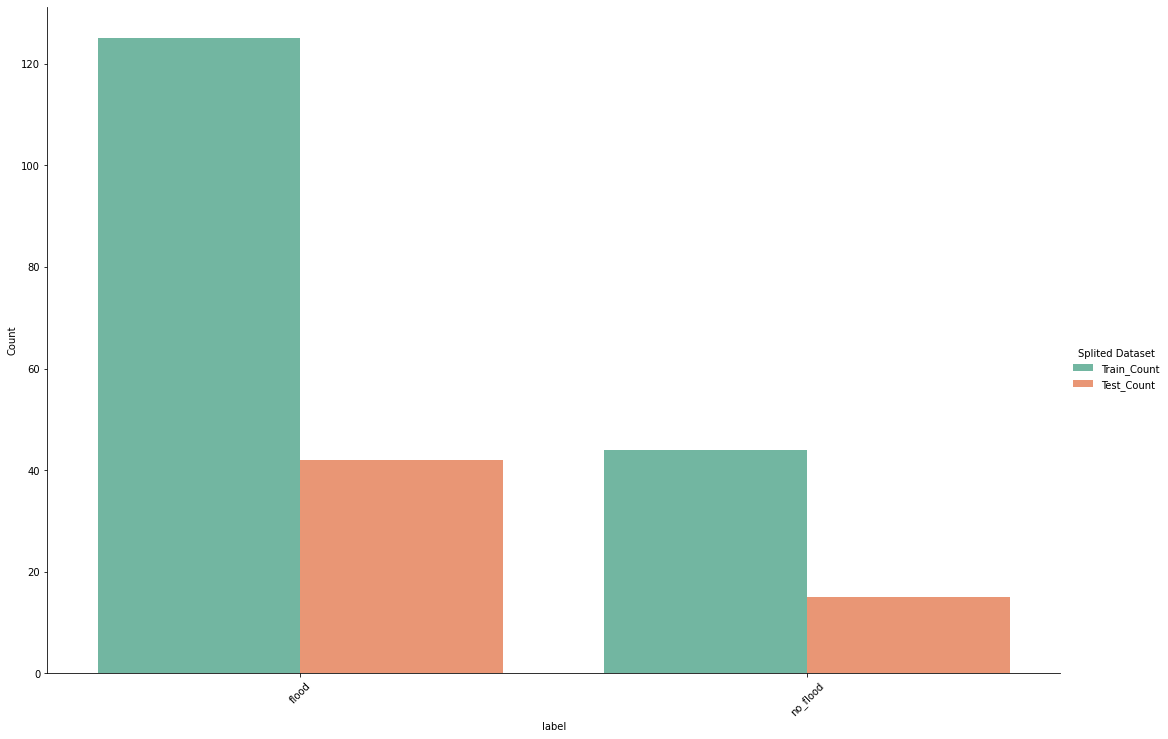

In [41]:
plt.figure(figsize=(20, 8))

g = sns.catplot(
    data=df_info, kind='bar',
    x='label', y='Count', hue='Split', palette='Set2', height=10, aspect=1.5)

plt.xticks(rotation=45)
g.set_axis_labels('label', 'Count')
g.legend.set_title('Splited Dataset')

In [18]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [19]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [21]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision')
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [22]:
# X_train = np.asarray(X_train).astype(np.float32)
# y_train = np.asarray(y_train).astype(np.float32)

In [23]:
from tensorflow import keras

keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [24]:
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
6/6 [==============================] - 13s 696ms/step - loss: 0.6696 - accuracy: 0.5976 - precision: 0.7355
Epoch 2/50
6/6 [==============================] - 4s 712ms/step - loss: 0.6185 - accuracy: 0.7396 - precision: 0.7396
Epoch 3/50
6/6 [==============================] - 5s 734ms/step - loss: 0.5753 - accuracy: 0.7396 - precision: 0.7396
Epoch 4/50
6/6 [==============================] - 4s 725ms/step - loss: 0.5576 - accuracy: 0.7396 - precision: 0.7396
Epoch 5/50
6/6 [==============================] - 5s 738ms/step - loss: 0.5306 - accuracy: 0.7574 - precision: 0.7530
Epoch 6/50
6/6 [==============================] - 5s 738ms/step - loss: 0.5302 - accuracy: 0.7456 - precision: 0.7440
Epoch 7/50
6/6 [==============================] - 5s 757ms/step - loss: 0.5127 - accuracy: 0.7456 - precision: 0.7440
Epoch 8/50
6/6 [==============================] - 5s 745ms/step - loss: 0.5147 - accuracy: 0.7811 - precision: 0.7716
Epoch 9/50
6/6 [==============================] - 5s 74

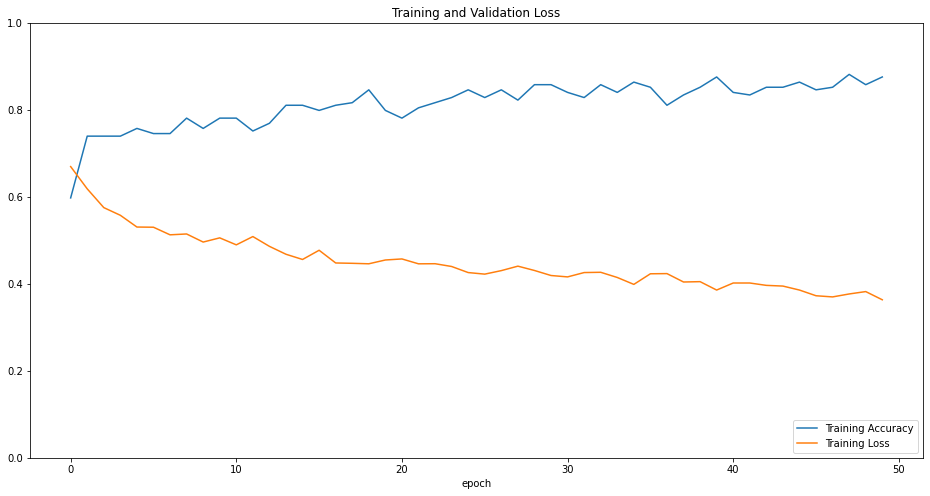

In [26]:
acc = history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(16, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(loss, label='Training Loss')
plt.legend(loc='lower right')
plt.ylim([0,1.0])
plt.title('Training Accuracy vs Training Loss')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [43]:
# model.save(r'D:\NSU\GitHub Repository\Flood_Assessment\model_train\text_model')
model.save(r'D:\NSU\GitHub Repository\Flood_Assessment\model_train\text_model.h5')

In [30]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 2s 620ms/step - loss: 0.4227 - accuracy: 0.7895 - precision: 0.7778


[0.4227389395236969, 0.7894737124443054, 0.7777777910232544]

In [31]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)

2/2 [==============================] - 2s 769ms/step


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted, target_names=class_names))

              precision    recall  f1-score   support

       flood       1.00      0.20      0.33        15
    no_flood       0.78      1.00      0.88        42

    accuracy                           0.79        57
   macro avg       0.89      0.60      0.60        57
weighted avg       0.84      0.79      0.73        57



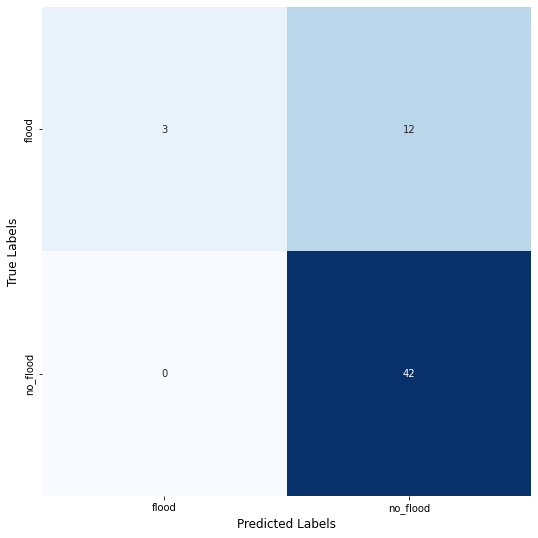

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(10,9))
sns.heatmap(cm, annot=True, square=True, xticklabels=class_names, yticklabels=class_names, fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()